In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [7]:
# Load the data
data = pd.read_csv('shuffled_dataset_new.csv')

# Handle NaN values
# data.interpolate(inplace=True)

print("Safe and Unsafe data:", data.shape)

data.head()

Safe and Unsafe data: (16802, 23)


,SQL statement,SQL Statement Tainted,HTML Tag,HTML Tag Tainted,Dangerous Function,Dangerous Function Tainted,Import Functions,Import Functions Tainted,URI Scheme,URI Scheme Tainted,...,Array Type,Function Type,Boolean Type,JSON Parse,JS Object Type,SQLi,XSS,Command/Code Injection,File Inclusion,Prototype Pollution
0,0.0,0.0,0.0,0.0,0.000,0.0000,0.8719,0.9066,0.6905,0.0377,...,0.0000,0.0000,0.000,0.0000,0.0000,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.8523,0.4889,0.566,0.1995,0.7675,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.986,0.9897,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.000,0.0000,0.0000,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000,0.0000,0.4625,0.8034,0.0795,0.3123,...,0.0000,0.0000,0.000,0.0000,0.0000,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.000,0.0000,0.8744,0.1011,0.6207,0.7700,...,0.0000,0.0000,0.000,0.0000,0.0000,0.0,0.0,0.0,1.0,0.0


In [8]:
# Shuffle the data
data = data.sample(frac=1).reset_index(drop=True)

In [9]:
# Cut the data 21 columns as X and last 6 columns as Y
X = data.iloc[:, :-5]
X.head()

,SQL statement,SQL Statement Tainted,HTML Tag,HTML Tag Tainted,Dangerous Function,Dangerous Function Tainted,Import Functions,Import Functions Tainted,URI Scheme,URI Scheme Tainted,Object Type,String Type,Number Type,Array Type,Function Type,Boolean Type,JSON Parse,JS Object Type
0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.2811,0.7828,0.0235,0.1253,0.3672,0.7611,0.3216,0.3922
1,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.8187,0.4522,0.6448,0.0543,0.8800,0.3635,0.0034,0.8423
2,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.9316,0.8896,0.8074,0.4740,0.5067,0.0396,0.7989,0.4641
3,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.6370,0.5079,0.3743,0.0675,0.1891,0.8602,0.1850,0.0455
4,0.0,0.0,0.0,0.0,0.0647,0.9733,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [10]:
Y = data.iloc[:, -5:]
Y.head()

,SQLi,XSS,Command/Code Injection,File Inclusion,Prototype Pollution
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0


In [11]:
# Count all Y that are all zeros
print("Non Vulnerables: ", Y[Y.sum(axis=1) == 0].shape)
# Count all Y that contains at least one 1
print("Vulnerables: ", Y[Y.sum(axis=1) > 0].shape)

Non Vulnerables:  (0, 5)
Vulnerables:  (16802, 5)


In [12]:
# Split the data into training and testing sets 70% training and 30% testing
# Remove first row of column names
X = X.astype(float)
Y = Y.astype(float)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)

X_train: (11761, 18)
Y_train: (11761, 5)
X_test: (5041, 18)
Y_test: (5041, 5)


In [13]:
# Train the model
# Columns 1-21 are the X values and columns 22-27 are the Y values
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Predict the test data
Y_pred = model.predict(X_test)
# Print the classification report
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       639
           1       1.00      1.00      1.00       605
           2       1.00      1.00      1.00      1163
           3       1.00      1.00      1.00       603
           4       1.00      1.00      1.00      2031

   micro avg       1.00      1.00      1.00      5041
   macro avg       1.00      1.00      1.00      5041
weighted avg       1.00      1.00      1.00      5041
 samples avg       1.00      1.00      1.00      5041



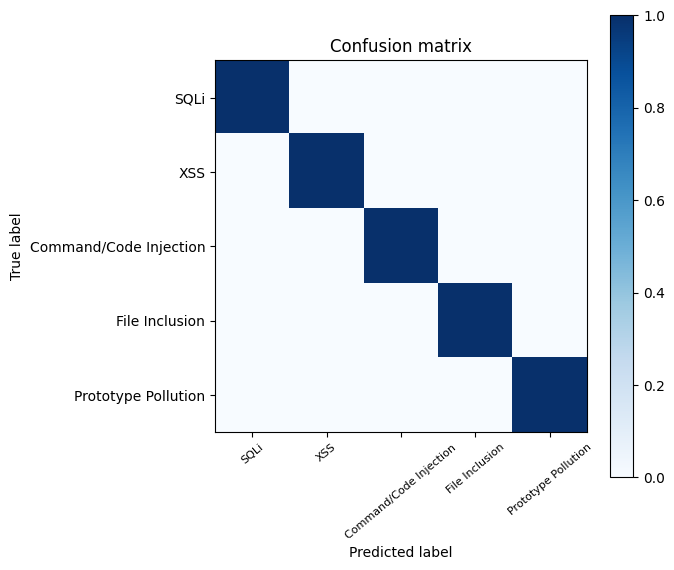

In [15]:
# Plot the confusion matrix
def plot_confusion_matrix(Y_test, Y_pred):
    cm = confusion_matrix(Y_test.values.argmax(axis=1), Y_pred.argmax(axis=1))
    cm = cm / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(Y.columns))
    plt.xticks(tick_marks, Y.columns, rotation=40, fontsize=8)
    plt.yticks(tick_marks, Y.columns)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

plot_confusion_matrix(Y_test, Y_pred)

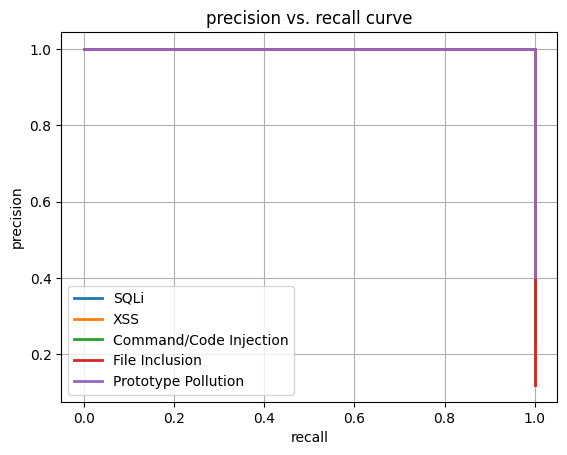

In [16]:
# Print the Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precision = dict()
recall = dict()

for i in range(Y.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(Y_test.iloc[:, i], Y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='{}'.format(Y.columns[i]))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
# add grid
plt.grid()
plt.show()

In [17]:
# Save the model
filename = 'bloom_model_newestestest.sav'
pickle.dump(model, open(filename, 'wb'))

In [13]:
# clean the plot
plt.clf()

# Try Multionomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()
model.fit(X_train, Y_train.values.argmax(axis=1))
Y_pred = model.predict(X_test)
print(classification_report(Y_test.values.argmax(axis=1), Y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       595
           1       1.00      0.99      0.99       598
           2       0.99      1.00      1.00      1207
           3       1.00      1.00      1.00       624
           4       1.00      1.00      1.00      1176

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200



<Figure size 640x480 with 0 Axes>

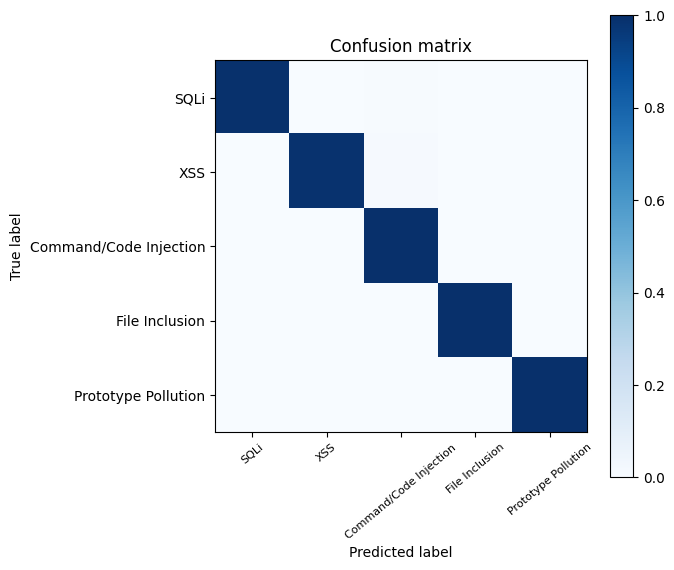

In [14]:
# Print the confusion matrix
cm = confusion_matrix(Y_test.values.argmax(axis=1), Y_pred)
cm = cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(Y.columns))
plt.xticks(tick_marks, Y.columns, rotation=40, fontsize=8)
plt.yticks(tick_marks, Y.columns)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

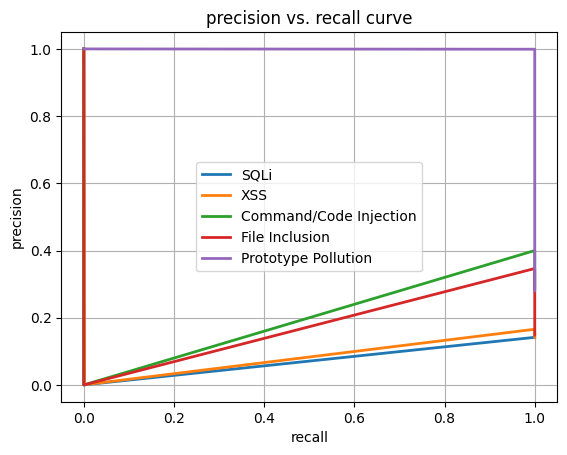

In [15]:
# Print the Precision-Recall Curve
precision = dict()
recall = dict()

for i in range(Y.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(Y_test.iloc[:, i], Y_pred)
    plt.plot(recall[i], precision[i], lw=2, label='{}'.format(Y.columns[i]))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
# add grid
plt.grid()
plt.show()


In [16]:
plt.clf()

# Try SVM model
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, Y_train.values.argmax(axis=1))
Y_pred = model.predict(X_test)
print(classification_report(Y_test.values.argmax(axis=1), Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       595
           1       1.00      0.99      1.00       598
           2       1.00      1.00      1.00      1207
           3       1.00      1.00      1.00       624
           4       1.00      1.00      1.00      1176

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200



<Figure size 640x480 with 0 Axes>

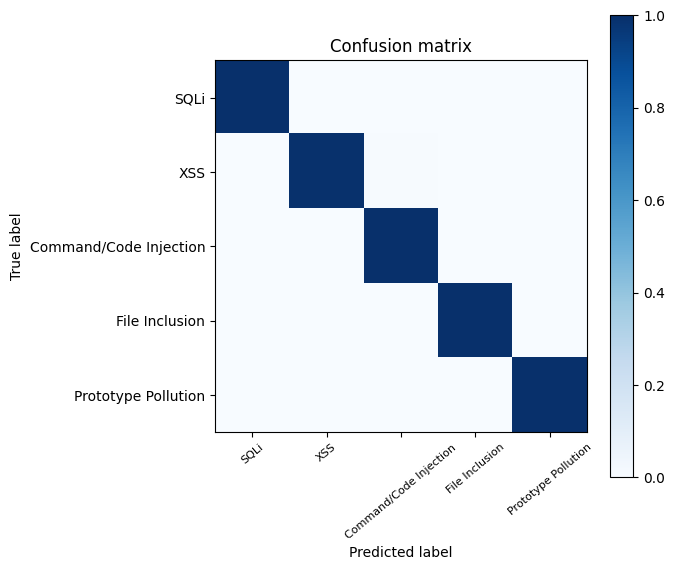

In [17]:
# Print the confusion matrix
cm = confusion_matrix(Y_test.values.argmax(axis=1), Y_pred)
cm = cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(Y.columns))
plt.xticks(tick_marks, Y.columns, rotation=40, fontsize=8)
plt.yticks(tick_marks, Y.columns)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

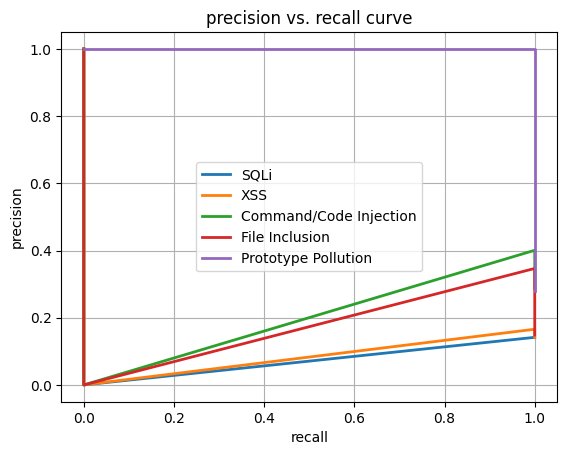

In [18]:
# Print the Precision-Recall Curve
precision = dict()
recall = dict()

for i in range(Y.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(Y_test.iloc[:, i], Y_pred)
    plt.plot(recall[i], precision[i], lw=2, label='{}'.format(Y.columns[i]))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
# add grid
plt.grid()
plt.show()

In [19]:
plt.clf()

# Try Backpropagation Neural Network
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=10)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       595
           1       1.00      0.99      0.99       598
           2       1.00      1.00      1.00      1207
           3       1.00      1.00      1.00       624
           4       1.00      1.00      1.00      1176

   micro avg       1.00      1.00      1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200
 samples avg       1.00      1.00      1.00      4200



/home/srn/bloom-experiment-lab/dataprocessing/parsergen/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/srn/bloom-experiment-lab/dataprocessing/parsergen/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 640x480 with 0 Axes>

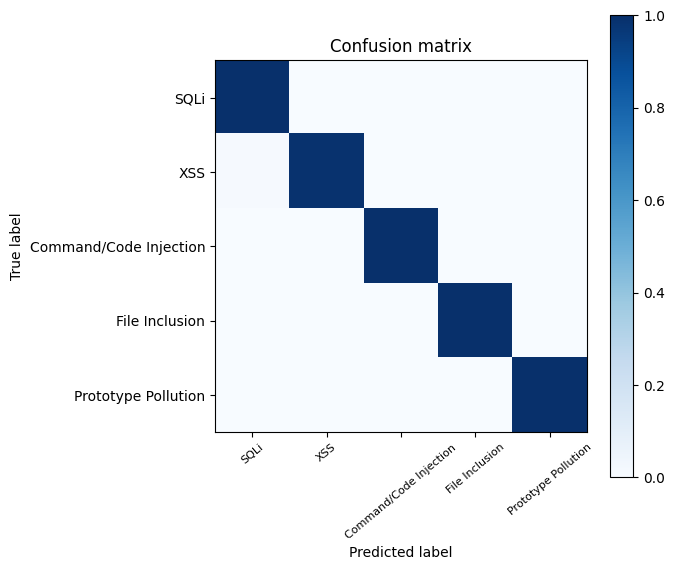

In [20]:
# Print the confusion matrix
plot_confusion_matrix(Y_test, Y_pred)

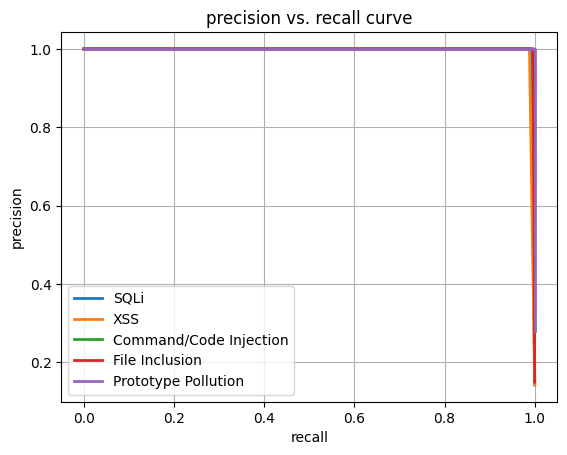

In [21]:
# Print the Precision-Recall Curve
precision = dict()
recall = dict()

for i in range(Y.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(Y_test.iloc[:, i], Y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='{}'.format(Y.columns[i]))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
# add grid
plt.grid()
plt.show()